In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
df = pd.read_excel("Beck Anxiety Inventory Questionnaire (Responses).xlsx")

In [5]:
df.head()

,Unnamed: 0,Please state your gender,Please state your age group,Numbness or tingling,Feeling hot,Wobbliness in legs,Unable to relax,Fear of worst happening,Dizzy or lightheaded,Heart pounding / racing,...,Fear of losing control,Difficulty in breathing,Fear of dying,Scared,Indigestion,Faint / lightheaded,Face flushed,Hot / cold sweats,How would you score your anxiety out of 63,Actual BAI Score
0,NaN,Female,20-24,0,2,0,3,3,2,3,...,3,2,0,3,0,0,2,4,45,34
1,NaN,Female,20-24,1,1,0,0,2,0,2,...,0,2,2,2,0,0,0,2,40,21
2,NaN,Male,20-24,0,0,0,0,0,0,3,...,0,0,3,2,0,0,0,0,5,14
3,NaN,Male,20-24,1,1,1,2,2,2,2,...,1,3,2,1,1,2,1,3,42,29
4,NaN,Female,20-24,1,1,0,1,2,0,0,...,1,0,0,1,0,0,0,0,63,10


In [6]:
df.shape

(100, 26)

In [7]:
df.columns

Index(['Unnamed: 0', 'Please state your gender', 'Please state your age group',
       'Numbness or tingling', 'Feeling hot', 'Wobbliness in legs',
       'Unable to relax', 'Fear of worst happening', 'Dizzy or lightheaded ',
       'Heart pounding / racing', 'Unsteady', 'Terrified or afraid', 'Nervous',
       'Feeling of choking', 'Hands trembling', 'Shaky / unsteady ',
       'Fear of losing control', 'Difficulty in breathing', 'Fear of dying',
       'Scared', 'Indigestion', 'Faint / lightheaded', 'Face flushed',
       'Hot / cold sweats', 'How would you score your anxiety out of 63',
       'Actual BAI Score'],
      dtype='object')

In [8]:
df.isna().sum()

Unnamed: 0                                    100
Please state your gender                        0
Please state your age group                     0
Numbness or tingling                            0
Feeling hot                                     0
Wobbliness in legs                              0
Unable to relax                                 0
Fear of worst happening                         0
Dizzy or lightheaded                            0
Heart pounding / racing                         0
Unsteady                                        0
Terrified or afraid                             0
Nervous                                         0
Feeling of choking                              0
Hands trembling                                 0
Shaky / unsteady                                0
Fear of losing control                          0
Difficulty in breathing                         0
Fear of dying                                   0
Scared                                          0


In [9]:
df = df.drop(columns=["Unnamed: 0"], errors='ignore')

In [10]:
label_enc = LabelEncoder()
df["Gender"] = label_enc.fit_transform(df["Please state your gender"])
df["Age Group"] = label_enc.fit_transform(df["Please state your age group"])

In [11]:
def categorize_anxiety(score):
    if score <= 9:
        return "Minimal"
    elif 10 <= score <= 16:
        return "Mild"
    elif 17 <= score <= 29:
        return "Moderate"
    else:
        return "Severe"

In [12]:
df["Anxiety Level"] = df["Actual BAI Score"].apply(categorize_anxiety)

In [13]:
X = df.drop(columns=["Please state your gender", "Please state your age group", "Actual BAI Score", "Anxiety Level"])
y = df["Anxiety Level"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [15]:
models = {
    "Logistic Regression": Pipeline([("scaler", StandardScaler()), ("clf", LogisticRegression(random_state=42))]),
    "SVC": Pipeline([("scaler", StandardScaler()), ("clf", SVC(kernel="linear", random_state=42))]),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

In [16]:
results = {}
conf_matrices = {}
feature_importances = {}

In [17]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = accuracy_score(y_test, y_pred)
    conf_matrices[name] = confusion_matrix(y_test, y_pred)

    # Extract feature importance if applicable
    if hasattr(model, 'feature_importances_'):
        feature_importances[name] = model.feature_importances_
    elif hasattr(model, 'coef_'):
        feature_importances[name] = np.abs(model.coef_).flatten()

In [18]:
print("Model Accuracies:")
for model, acc in results.items():
    print(f"{model}: {acc:.2f}")

Model Accuracies:
Logistic Regression: 0.65
SVC: 0.85
Random Forest: 0.70
Gradient Boosting: 0.60


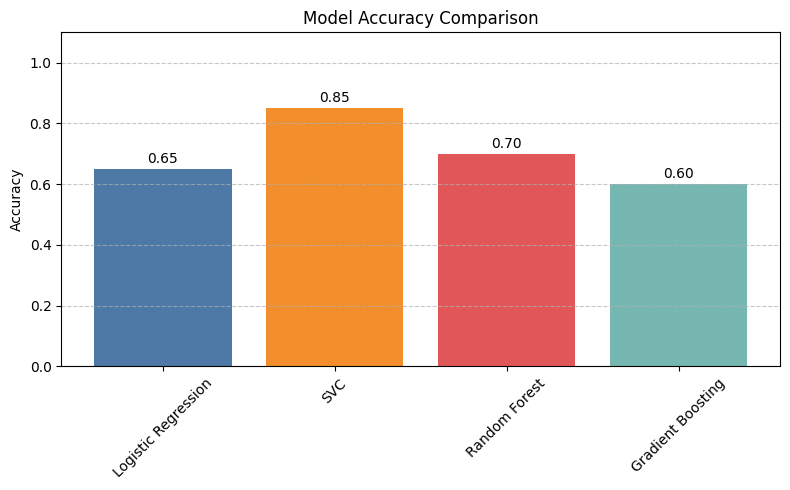

In [22]:
import matplotlib.pyplot as plt

# Define a professional color palette (e.g., Tableau, ColorBrewer, or custom soft tones)
colors = ['#4E79A7', '#F28E2B', '#E15759', '#76B7B2']  # Blue, Orange, Red, Teal

# Bar chart of model accuracies
plt.figure(figsize=(8, 5))
bars = plt.bar(results.keys(), results.values(), color=colors)

# Add accuracy values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1.1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


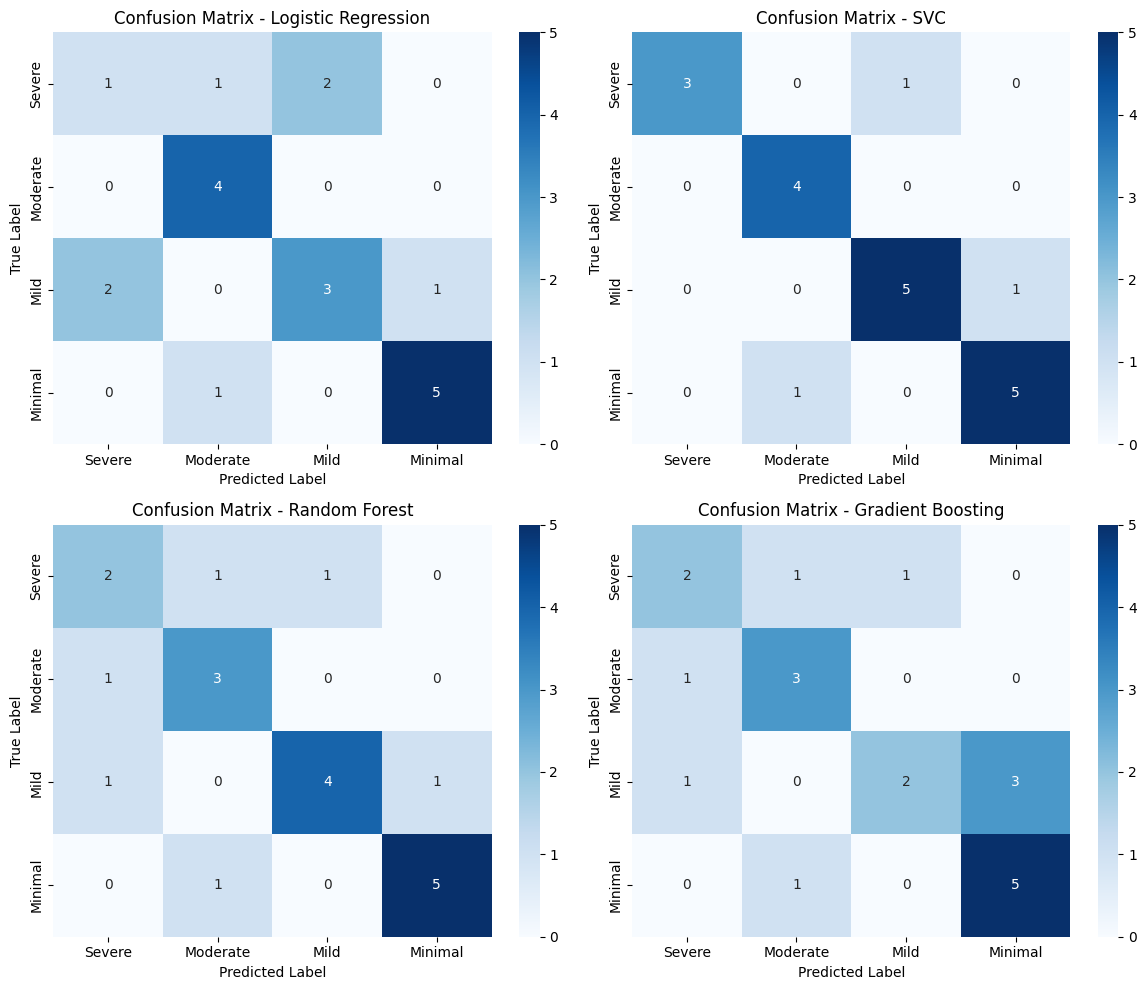

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, (name, cm) in enumerate(conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=y.unique(), yticklabels=y.unique(), ax=axes[i])
    axes[i].set_title(f"Confusion Matrix - {name}")
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

plt.tight_layout()
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14488\805186024.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.array(importance), y=np.array(features), palette="Blues_r")


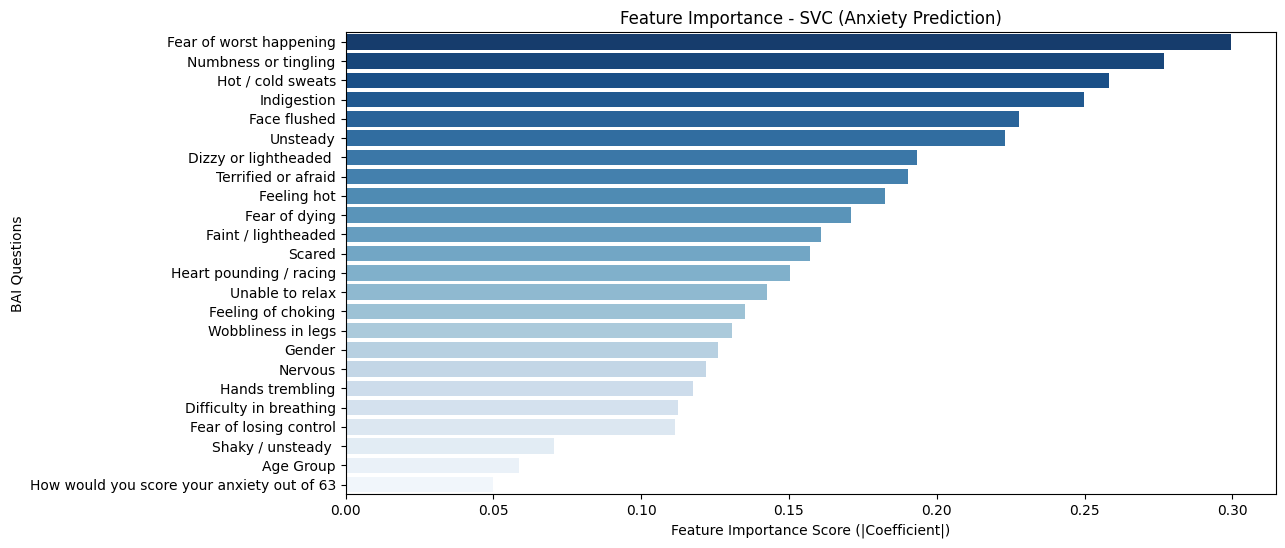

In [21]:


# Extract SVC model coefficients
svc_model = models["SVC"].named_steps["clf"]
coefficients = np.abs(svc_model.coef_).mean(axis=0)  # Take absolute mean across all classes

# Associate coefficients with feature names
feature_importance = dict(zip(X.columns, coefficients))

# Sort features by importance
sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Separate keys and values for plotting
features, importance = zip(*sorted_features)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x=np.array(importance), y=np.array(features), palette="Blues_r")
plt.xlabel("Feature Importance Score (|Coefficient|)")
plt.ylabel("BAI Questions")
plt.title("Feature Importance - SVC (Anxiety Prediction)")
plt.show()
